# Tutorial Notebook for nisarhdf.nisarGCOVHDF
---

This notebook demonstrates the functionality of `nisarGCOVHDF`, which is at tool for reading NISAR **GCOV** products.  Some of its functionality is specifically developed for the Greenland Mapping Project (GrIMP) workflows, but it may also be of general use for working with these products. If nothing else, the source code provides examples of how to unpack these projects.

## Installation

The easiest way to ensure the code works is to create a custom environment using the *environment.yml* file included in this *nisarhdf* repository. To do so execute the following,

`conda env create -f environment.yml`

Then setup the kernel for the Jupyter notebooks with the command:

`python -m ipykernel install --user --name=nisarcryo`

Then activate the environment:

`conda activate nisarcryo`

Finally, start Jupyter and open the notebooks.

**Even if you want to work with your existing environment, the *environment.yml* file demonstrates which packages must be installed if they are not already present.**


## Python Imports

In [1]:
%load_ext autoreload
%autoreload 2
import nisarhdf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rioxarray
from osgeo import gdal
import os
import getpass
import os

In [2]:
if not os.path.exists('./output'):
    os.mkdir('./output')

## Open the HDF

Access files via:

- **`s3`** – ODS links (e.g., `s3://nisar-public/...`)
- **`https`** – NISAR sample product suite via ASF (e.g., redirect to signed S3 URL)
- **`local`** – Specify a local path to the HDF5 file.

Create an instance and open the hdf as shown below. For normal products, you shouldn't have to specify the orbit, but while the orbit fields are present in the example file, they are not populated. When you open the hdf, you can specify the precise orbit XMLs if desired, which are release a few weeks after the MOI orbits used in the processing.

In [3]:
files = {'s3': 's3://nisar-st-data-ondemand/ALOS-2-data/INSAR/cryo_sample_products_092024/frame_280/insar_products/gcov_ALOS2496725280-230804.h5',
         'https': 'https://nisar.asf.earthdatacloud.nasa.gov/NISAR-SAMPLE-DATA/GCOV/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001/'
            'NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5',
         'local': '/Volumes/insar1/ian/NISAR/frame_280/gcov/products/gcov_ALOS2496725280-230804.h5'} # Modify to local file path

In [4]:
GCOVFile  = files['https']
GCOVFile

'https://nisar.asf.earthdatacloud.nasa.gov/NISAR-SAMPLE-DATA/GCOV/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5'

In [5]:
%%time
myGCOV = nisarhdf.nisarGCOVHDF()
myGCOV.openHDF(GCOVFile, referenceOrbitXML=None, referenceOrbit=0)

[INFO] Resolving redirect: https://nisar.asf.earthdatacloud.nasa.gov/NISAR-SAMPLE-DATA/GCOV/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5
[INFO] Downloading from: https://d1mv8zhcvry6x4.cloudfront.net/s3-7fdfbcb0ce308dc58d08f97acb1f0590/sds-n-cumulus-prod-nisar-sample-data.s3.us-west-2.amazonaws.com/GCOV/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001/NISAR_L2_PR_GCOV_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5?A-userid=None&Expires=1750204349&Signature=Pzhmulkpeuwvi6h-kp2Ad9ovdd0vlLC47RlrYwL7Nl7EZgBfeS0xW0RMl8wS5Ro0RpwuhVosc3LabTZEsTvUaDtx4Gao6StWYCXqeLqde~-r4fj10uU~Us3kSDdsjPc1kuaDJvBC92oBEEZabDGsLl8qGiaqY~ygbhXJrJKgqbKNoS3wovEuJ1nYqchP8AZBD1CtGM-K~lBbJhetWJrdqBMr9fpUN8sCGdD~10EmseHCDKq4UYcZA6xUN7ndSG4s5vHVzFcJyBAs7NuF~zv-UlDkj7In~yyBZtSR5XEgETVSCAQElFAhfz3AyNXdQ5JNLCi

## GCOV Parameters

A summary of some of the more important parameters for the **GCOV** products can be obtained by.

In [6]:
myGCOV.printParams()

GCOV.referenceOrbit = 0 
GCOV.frame = 19 
GCOV.datetime = 2008-10-12 06:09:11.567105 
GCOV.referenceGranule = input_dir/NISAR_L1_PR_RSLC_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5 
GCOV.SLCNearRange = 743610.2093641666 
GCOV.SLCFarRange = 772526.1287896979 
GCOV.SLCFirstZeroDopplerTime = 22151.567105 
GCOV.SLCLastZeroDopplerTime = 22165.749341842104 
GCOV.LookDirection = right 
GCOV.PassType = ascending 
GCOV.Wavelength = 0.2360571 
GCOV.PRF = 1520.0 
GCOV.epsg = 32611 
GCOV.xSize = 4545 
GCOV.ySize = 6220 
GCOV.NumberRangeLooks = 1 
GCOV.NumberAzimuthLooks = 1 

Data Fields
GCOV.HHHH
GCOV.mask
GCOV.numberOfLooks
GCOV.rtcGammaToSigmaFactor


## Display Data

The following plots the fields associated with the **GCOV** product.

HHHH
mask
numberOfLooks
rtcGammaToSigmaFactor


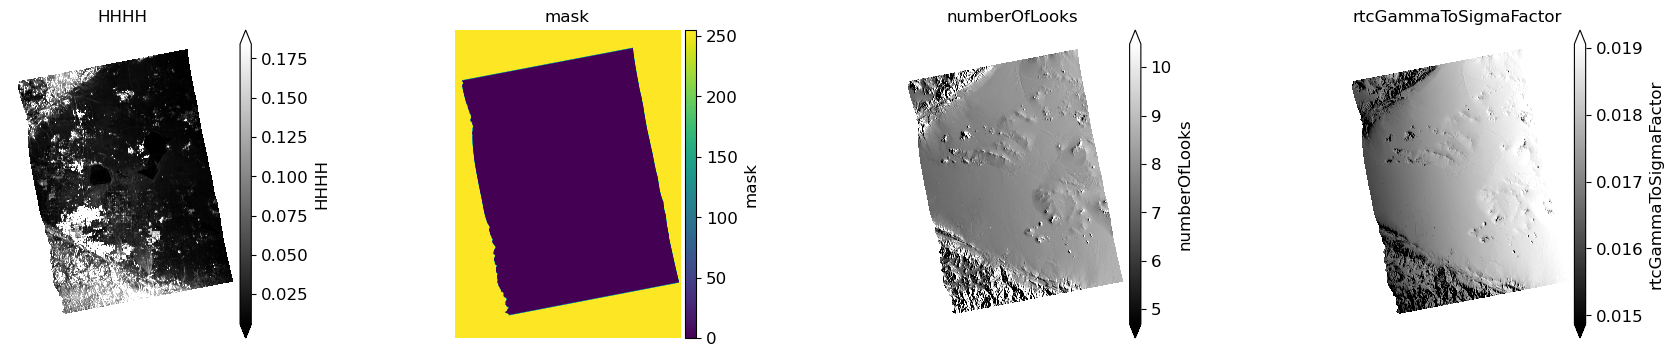

In [7]:
fields = myGCOV.dataFields
fig, axes = plt.subplots(1, len(fields), figsize=(22, 4))
for field, ax in zip(fields, axes.flatten()):
    data = getattr(myGCOV, field)
    print(field)
    vmin, vmax = nisarhdf.autoScaleRange(data, 95)
    if field not in ['mask']:
        h = ax.imshow(data, vmin=vmin, vmax=vmax, origin='upper', cmap='gray')
        nisarhdf.colorBar(h, ax, field, 'right', '5%',.05, 12, 12, extend='both')
    else:
        h = ax.imshow(data,  origin='upper')
        nisarhdf.colorBar(h, ax, field,'right', '5%',.05, 12, 12, extend='neither')
    ax.set_title(field)
    ax.axis('off')

## Metadata Interpolation

Much of the spatially dependent information (e.g., incidenceAngle) is stored as metadata cubes (see nisar documenation). These cubes can be interpolatated to obtain the x, y, and elevation dependent results. Here are examples of how to extract these data for the offset grids.

For each field, there is an interpolator method (e.g., `myGCOV.incidenceAngleCube(x, y, z)`). The examples below demonstrate how to interpolate the data cubes to the coordinates of the GCOV product.

### Setup Grid for the Offsets

In this step a range/Dopper grid corresponding to the offset maps is created. Note in this example we assume zero elevation, but the values can easily be substituted from a DEM.

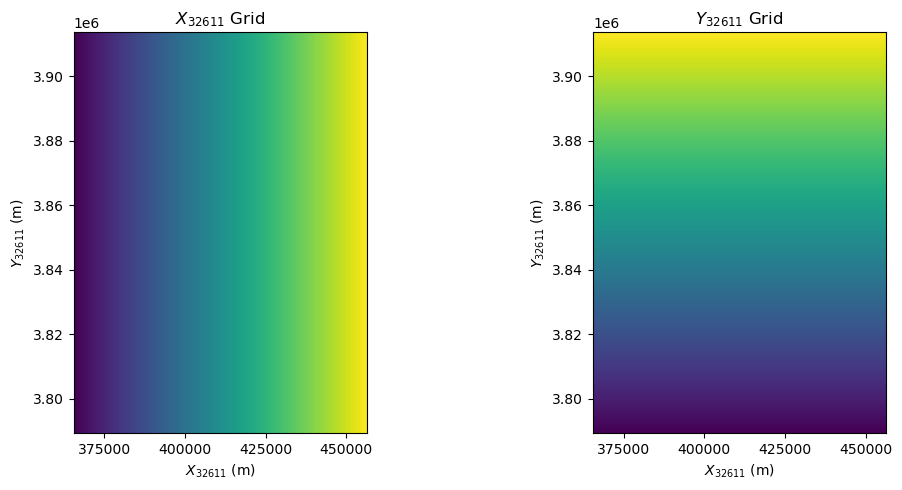

In [8]:
myGCOV.setupXYGrid()
z = np.zeros(myGCOV.xGrid.shape)
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].imshow(myGCOV.xGrid, extent=myGCOV.extentUL)
axes[1].imshow(myGCOV.yGrid, extent=myGCOV.extentUL)
for ax, field in zip(axes, [f'$X_{{{myGCOV.epsg}}}$ Grid',f'$Y_{{{myGCOV.epsg}}}$ Grid']):
    ax.set_title(field)
    ax.locator_params(axis='x', nbins=4)
    ax.set_title(field)
    ax.set_xlabel(f'$X_{{{myGCOV.epsg}}}$ (m)')
    ax.set_ylabel(f'$Y_{{{myGCOV.epsg}}}$ (m)')
fig.tight_layout()

### Incidence and Elevation Angles

The incidence and elevation angles can be computed as follows:

incidenceAngle min/max: 21.259 26.859
elevationAngle min/max: 19.076 24.030
CPU times: user 30.8 s, sys: 1min 8s, total: 1min 39s
Wall time: 1min 39s


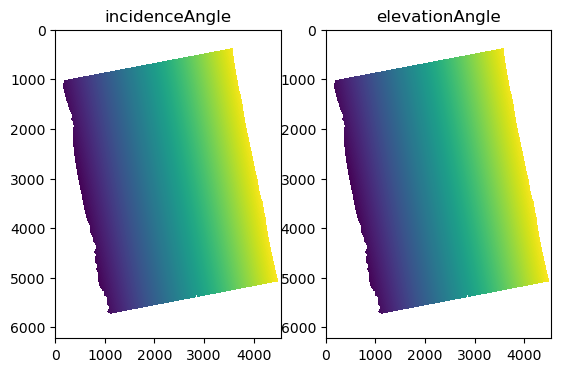

In [9]:
%%time
incidenceAngle = myGCOV.incidenceAngleCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations)
elevationAngle = myGCOV.elevationAngleCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations)
fig, axes = plt.subplots(1, 2)
for ax, var, title in zip(axes.flatten(), [incidenceAngle, elevationAngle], ['incidenceAngle', 'elevationAngle']):
    ax.imshow(var, origin='upper')
    ax.set_title(title)
    print(f'{title} min/max: {np.nanmin(var):.3f} {np.nanmax(var):.3f}')

### Ground Track Velocity

The ground track velocity is found by:

groundTrackVelocity min/max: 6835.998 6839.743


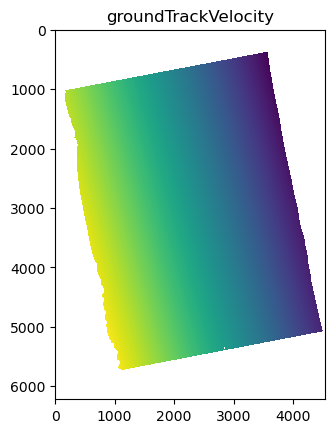

In [10]:
groundTrackVelocity=  myGCOV.groundTrackVelocityCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations)
fig, ax = plt.subplots(1,1)
ax.imshow(groundTrackVelocity, origin='upper')
ax.set_title('groundTrackVelocity')
print(f'groundTrackVelocity min/max: {np.nanmin(groundTrackVelocity):.3f} {np.nanmax(groundTrackVelocity):.3f}')

### Range-Doppler Coordinate

The `slantRange` and `zeroDopplerTime` coordinate at corresponding to the `x` and `y` can can be determined as:

slantRange min/max: 744203.690 773529.700
zeroDopplerTime min/max: 22151.566 22165.748


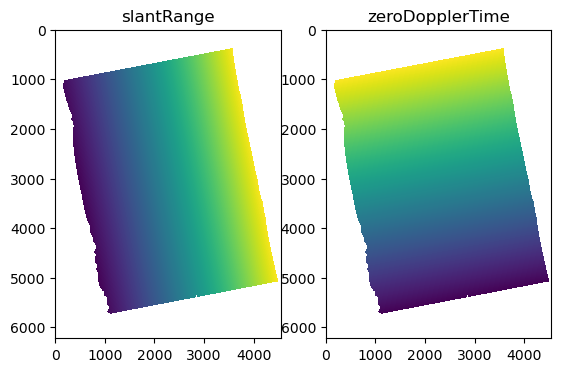

In [11]:
slantRange, zeroDopplerTime =  myGCOV.rangeDopplerCube(myGCOV.xGrid, myGCOV.yGrid, z, image='reference', maskNoData=myGCOV.noDataLocations)
fig, axes = plt.subplots(1, 2)
for ax, var, title in zip(axes.flatten(), [slantRange, zeroDopplerTime], ['slantRange', 'zeroDopplerTime']):
    ax.imshow(var, origin='upper')
    ax.set_title(title)
    print(f'{title} min/max: {np.nanmin(var):.3f} {np.nanmax(var):.3f}')

### Along Track Unit Vector and LOS Unit Vector

The x and y components of the line-of-sight and along-track unit vector can be determined on the offset grid by:

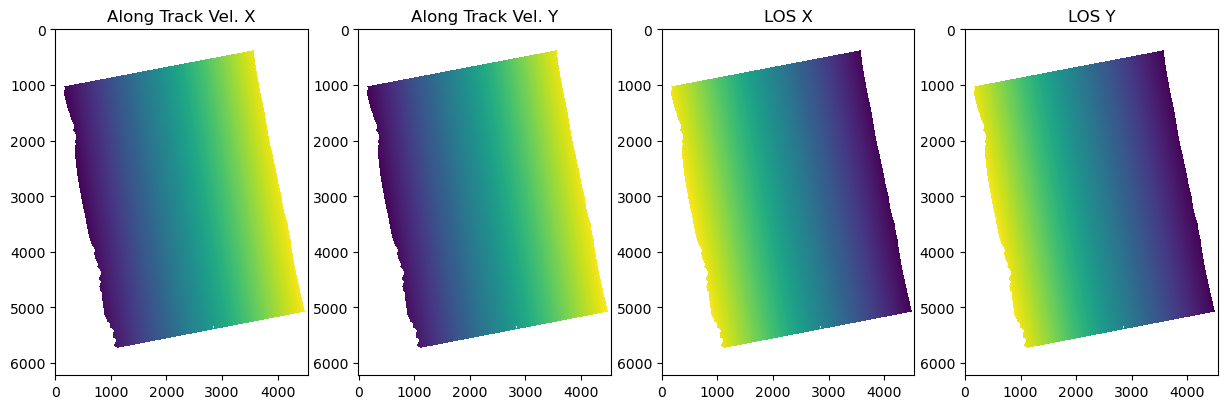

In [12]:
ATx, ATy =  myGCOV.alongTrackUnitVectorCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations)
LOSx, LOSy=  myGCOV.losUnitVectorCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations)
#
fig, axes = plt.subplots(1, 4, figsize=(15,5))
for ax, var, title in zip(axes.flatten(), [ATx, ATy, LOSx, LOSy], ['Along Track Vel. X', 'Along Track Vel. Y', 'LOS X', 'LOS Y']):
    ax.imshow(var, origin='upper')
    ax.set_title(title)

## Other Meta Data

Most of the essential meta data has been parsed and demonstrated in the examples above. Other quantities can be extracted by keyword from the h5 files. For example, the **centerFrequency** can be extracted as:

In [13]:
np.array(myGCOV.h5['GCOV']['grids']['frequencyA']['projection']).item()

32611

## Save Data to Binary or Tiff Files.

The data from the hdf can be save as individual tiffs, bound together by a single vrt file. The default is to write all of the bands e.,g `'VVVV'`, `'mask'`, `'numberOfLooks'`, and `'rtcGammaToSigmaFactor'` for a **GCOV** product, which is accomplished as follows.

In the previous example, the results were save as tiffs. To save as binary files, run with `tiff=False` for a more limited set of bands:

In [14]:
myGCOV.writeData('output/GCOVbinary', bands=[myGCOV.dataFields[0], 'rtcGammaToSigmaFactor'], tiff=False)
!ls output/GCOVbinary*

output/GCOVbinary.HHHH			 output/GCOVbinary.vrt
output/GCOVbinary.rtcGammaToSigmaFactor  output/GCOVbinary.VVVV


The data can be read back in as an `rioxarray`  using `nisarhdf.readVrtAsXarray`, which saves each band as a named data variable. The results can be displayed using the `xarray` version of `imshow`.

<xarray.Dataset> Size: 226MB
Dimensions:                (x: 4545, y: 6220)
Coordinates:
  * x                      (x) float64 36kB 3.655e+05 3.655e+05 ... 4.564e+05
  * y                      (y) float64 50kB 3.914e+06 3.914e+06 ... 3.789e+06
    spatial_ref            int64 8B 0
Data variables:
    HHHH                   (y, x) float32 113MB nan nan nan nan ... nan nan nan
    rtcGammaToSigmaFactor  (y, x) float32 113MB nan nan nan nan ... nan nan nan
Attributes: (12/19)
    bands:                    ['HHHH', 'rtcGammaToSigmaFactor']
    ByteOrder:                LSB
    datetime:                 2008-10-12 06:09:11.567105
    epsg:                     32611
    frame:                    19
    LookDirection:            right
    ...                       ...
    SLCFirstZeroDopplerTime:  22151.567105
    SLCLastZeroDopplerTime:   22165.749341842104
    SLCNearRange:             743610.2093641666
    Wavelength:               0.2360571
    xSize:                    4545
    ySize:                    6220

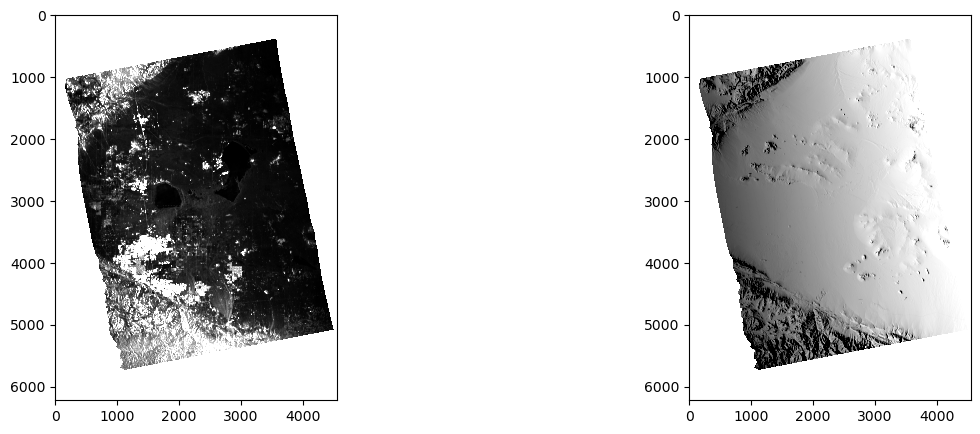

In [15]:
GCOVbinary = nisarhdf.readVrtAsXarray('output/GCOVbinary.vrt', mask_and_scale=True)
#extent = [np.min(GCOVbinary.x), np.max(GCOVbinary.x), np.min(GCOVbinary.y), np.max(GCOVbinary.y)
# Get the band names
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for var, ax in zip(GCOVbinary.data_vars, axes.flatten()):
    vmin, vmax = nisarhdf.autoScaleRange(GCOVbinary[var].data, 95)
    ax.imshow(GCOVbinary[var].data, cmap='gray', vmin=vmin, vmax=vmax)
GCOVbinary

## Save Gridded Data Cubes

The gridded data cubes can also be saved as either flat binary or as cloud-optimized geotiff (COG) files. In this case, use `save=True` to save the result internally, and then use `writeData` to save data the same way the other bands are saved. In the example below, the data are saved as COGs.

In [16]:
myGCOV.incidenceAngleCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations, save=True);
myGCOV.elevationAngleCube(myGCOV.xGrid, myGCOV.yGrid, z, maskNoData=myGCOV.noDataLocations, save=True);
myGCOV.writeData('output/GCOVangles',bands=['incidenceAngle', 'elevationAngle'], tiff=True) # ', 'elevationAngle'

<xarray.Dataset> Size: 226MB
Dimensions:         (x: 4545, y: 6220)
Coordinates:
  * x               (x) float64 36kB 3.655e+05 3.655e+05 ... 4.564e+05 4.564e+05
  * y               (y) float64 50kB 3.914e+06 3.914e+06 ... 3.789e+06 3.789e+06
    spatial_ref     int64 8B 0
Data variables:
    incidenceAngle  (y, x) float32 113MB nan nan nan nan nan ... nan nan nan nan
    elevationAngle  (y, x) float32 113MB nan nan nan nan nan ... nan nan nan nan
Attributes: (12/19)
    bands:                    ['incidenceAngle', 'elevationAngle']
    ByteOrder:                LSB
    datetime:                 2008-10-12 06:09:11.567105
    epsg:                     32611
    frame:                    19
    LookDirection:            right
    ...                       ...
    SLCFirstZeroDopplerTime:  22151.567105
    SLCLastZeroDopplerTime:   22165.749341842104
    SLCNearRange:             743610.2093641666
    Wavelength:               0.2360571
    xSize:                    4545
    ySize:                    6220

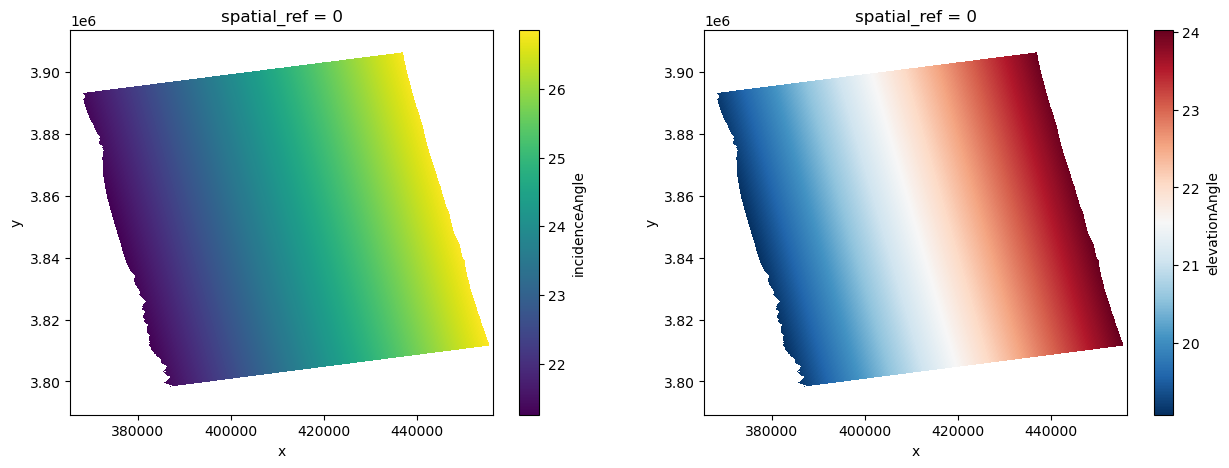

In [17]:
GCOVTiff = nisarhdf.readVrtAsXarray('output/GCOVangles.vrt', mask_and_scale=True)
#extent = [np.min(GCOVbinary.x), np.max(GCOVbinary.x), np.min(GCOVbinary.y), np.max(GCOVbinary.y)
# Get the band names
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
GCOVTiff.incidenceAngle.plot.imshow(ax=axes[0])
GCOVTiff.elevationAngle.plot.imshow(ax=axes[1], cmap='RdBu_r')
GCOVTiff

# Anything below here is debug code that can be ignored